Diffusion Equation
$$
\frac{\partial \xi(x,t)}{\partial t} = D\frac{\partial^2\xi(x,t)}{\partial x^2},
$$
where $D$ is the diffusion constant.

In this simulation we can replace the second derivative with the spacially discretized version: $(\xi_{i+1} - 2\xi_i + \xi_{i-1})/a^2$

In this case our matrix M will be discretized and multiplied by $\frac{ka^2}{m}$

Our initial condition will be
$$
y(x) = e^{-x^2/(Na/10)^2}
$$

where $N$ is the number of oscillators and $a$ is the distance between them.

Putting it all together, our time evolution equation will be:
$$
\vec{y}(t+\delta t) =  \vec{y}(t) + \frac{D\delta t}{a^2} \mathbf{M} \vec{y}(t)
$$

In [81]:
import numpy as np
import matplotlib.pyplot as plt

#Setup Variables
k = 1
m = 1
a = 0.1
num_osc = 200 #number of oscillators
N = 1
D=10
x0 = 10

osc_pos = a * np.arange(0,num_osc,1) #oscillator position, essentially x axis variable

t_max = 150
dt = 0.01
t_values = np.arange(0,t_max,dt)

disp = np.zeros((num_osc, len(t_values)))

#Stiffness Matrix
main_diag = 2*np.ones(num_osc)
off_diag = -1*np.ones(num_osc-1)
stiffness = (k*a**2)/m * (np.diag(main_diag) + np.diag(off_diag,-1) + np.diag(off_diag,1))

#Initial Condition (Gaussian wave packet)
disp[:,0] = np.exp((-(osc_pos-x0)**2)/(((num_osc*a)/10)**2))

#Euler method
for i in range(len(t_values)-1):
  disp[:,i+1] = disp[:,i] - (((D*dt)/a**2)*stiffness) @ disp[:,i]

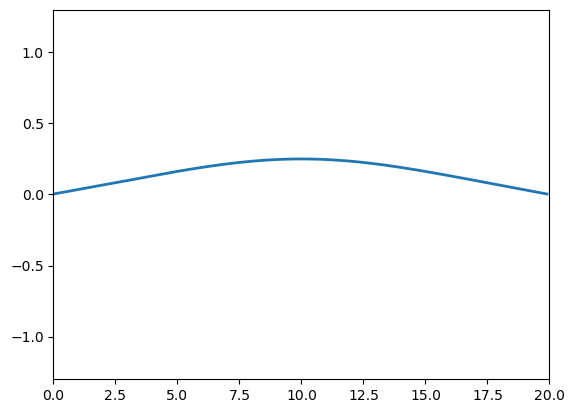

In [82]:
#Animation of diffusion

from matplotlib import animation
from IPython.display import HTML

x_max = a*num_osc

y_max = 1.3

fig = plt.figure()
ax = plt.axes(xlim=(0, x_max), ylim=(-y_max, y_max))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(osc_pos, disp[:,i])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=range(0,int(t_max/dt),int(1/dt)), interval=100, blit=True)

HTML(anim.to_html5_video())

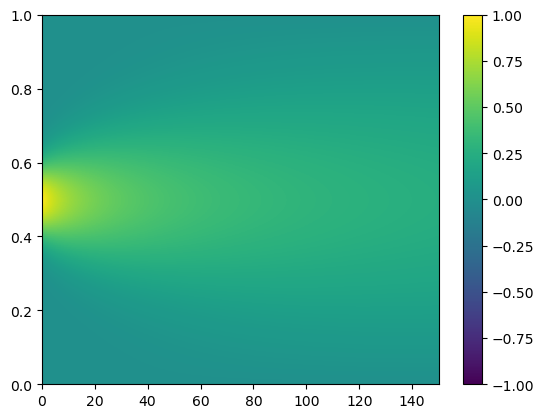

In [83]:
plt.imshow(disp, extent=[0,dt*len(t_values),0,1], vmin=-1, vmax=1)
plt.colorbar()
plt.axis('auto');
#Showing a more realistic situation of how heat might spread through a medium

The time-independent 1D Schrodinger Equation can be written as:
$$
\frac{\partial \psi(x,t)}{\partial t} = i\frac{\hbar}{2m}\frac{\partial^2\psi(x,t)}{\partial x^2}
$$

and thus is essentially the diffusion equation with an imaginary diffusion constant $D$.

This new formulation allows us to give our initial gaussian wave packet momentum, without it losing energy. With the intial condition with some momentum $p$ being: 
$$
\psi(x) = e^{-x^2/(Na/10)^2}e^{ipx}
$$

In [150]:
#import scipy.constants as sp

D = 1j*1

p = 2


disp = np.zeros((num_osc, len(t_values)), dtype = complex)

disp[:,0] = np.exp((-(osc_pos-x0)**2)/(((num_osc*a)/10)**2))*np.exp(1j*p*osc_pos)

for i in range(len(t_values)-1):
  disp[:,i+1] = disp[:,i] - (((D*dt)/a**2)*stiffness) @ disp[:,i]

absdisp = np.absolute(disp)
#Will give a warning saying we are getting rid of imaginary part, thats okay because we only want to graph the real part

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


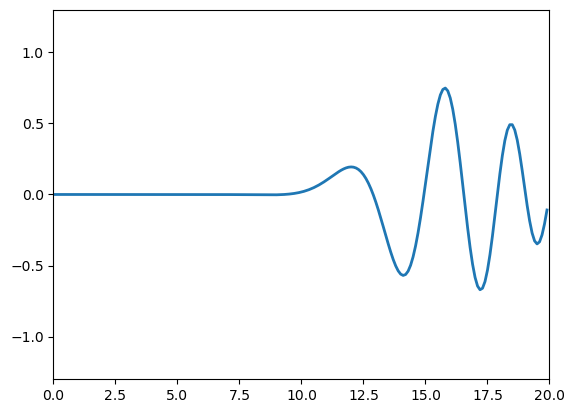

In [152]:
fig = plt.figure()
ax = plt.axes(xlim=(0, x_max), ylim=(-y_max, y_max))
line, = ax.plot([], [], lw=2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=range(0,int(t_max/dt),int(1/dt)), interval=100, blit=True)

HTML(anim.to_html5_video())

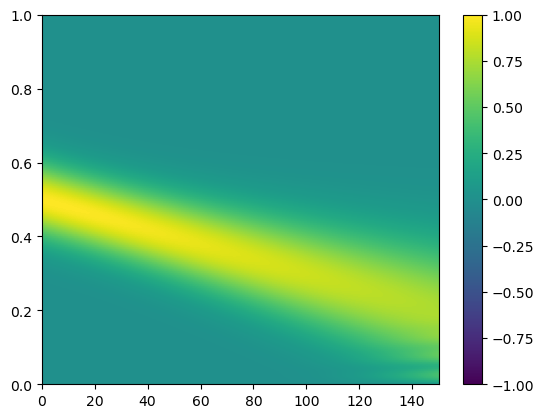

In [154]:
plt.imshow(absdisp, extent=[0,dt*len(t_values),0,1], vmin=-1, vmax=1)
plt.colorbar()
plt.axis('auto');